## Ecuaciones químicas

$$   P \xrightarrow{ \gamma} P + RNA, $$

$$   P + S  \xrightarrow{k}  P + S + mRNA,$$

$$   mRNA \xrightarrow{k_2} mRNA  + A$$

$$ P + A \underset{k_{off3}}{\overset{k_{on3}}{\rightleftharpoons}}  C_4$$

$$ C_4 + A \underset{k_{off4}}{\overset{k_{on4}}{\rightleftharpoons}}  C_2$$
  
$$RNA \xrightarrow{\delta_2} \o$$

$$A \xrightarrow{\delta} \o$$

$$C2\xrightarrow{\delta_5} \o$$

$$C4\xrightarrow{\delta_6} \o$$

$$ ptot=P+C_2+C_4$$

$$ P=ptot-(C_2+C_4) $$  

$$ P=1-(C_2+C_4) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import *

from scipy.integrate import odeint


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pylab
from pylab import *


from scipy.integrate import odeint


## Total A

/Users/liberPH/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


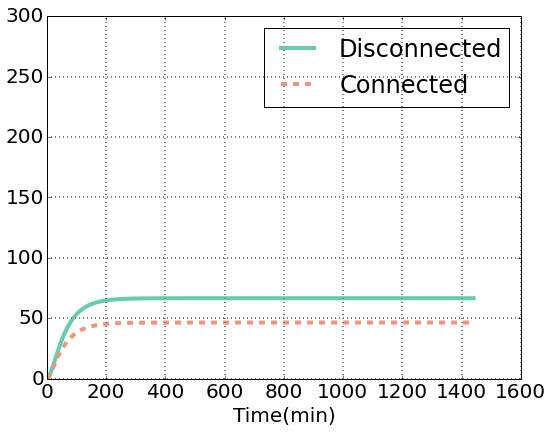

In [3]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; d4=d; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;

kon=0; koff=0;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)
pylab.ylim([0,300])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_seq_bind_S_50_deg_weak.eps',format="eps")
show()




/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


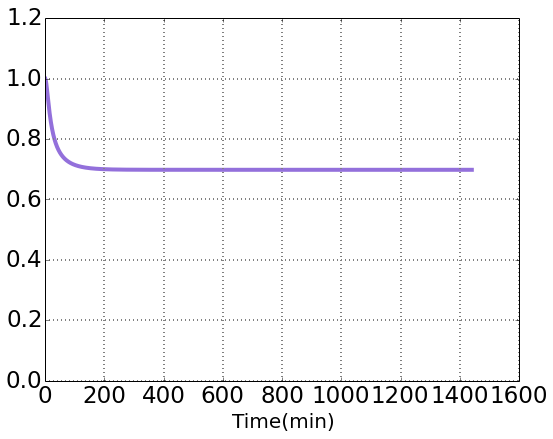

In [4]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
a1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_seq_bind_S_50_deg_ratio_weak.eps',format="eps")
show()

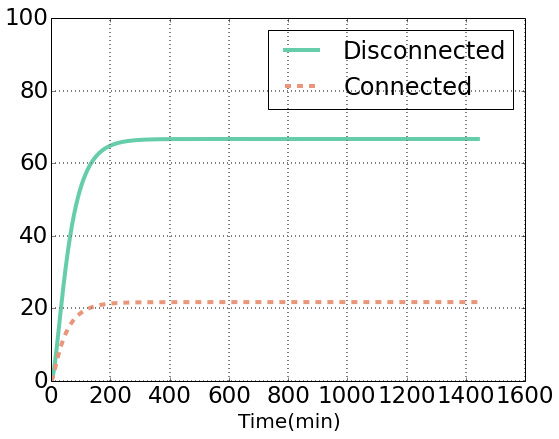

In [5]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; d4=d; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;

kon=0; koff=0;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)
pylab.ylim([0,100])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Monomer_A_seq_bind_S_50_deg_weak_scale_100.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


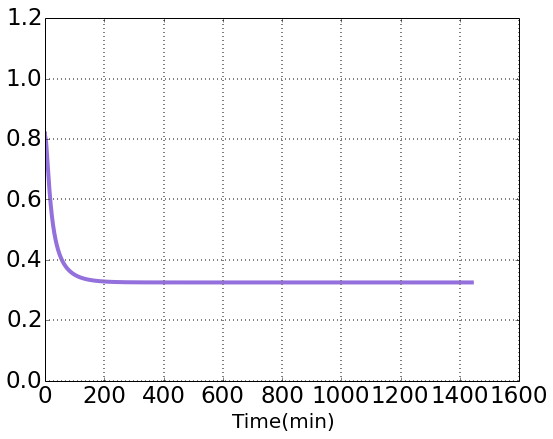

In [6]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
a1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Monomer_A_seq_bind_S_50_deg_ratio_weak.eps',format="eps")
show()

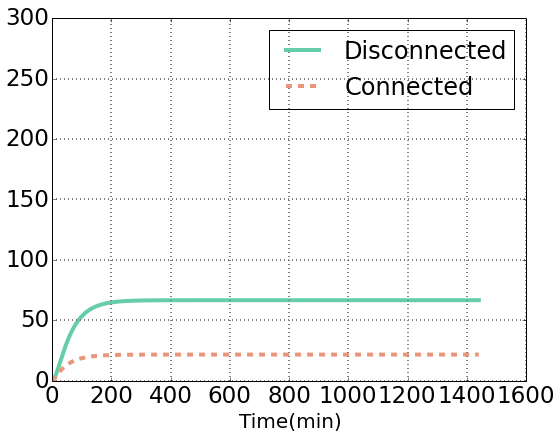

In [7]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)
pylab.ylim([0,300])
xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_seq_bind_S_50_deg_weak.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


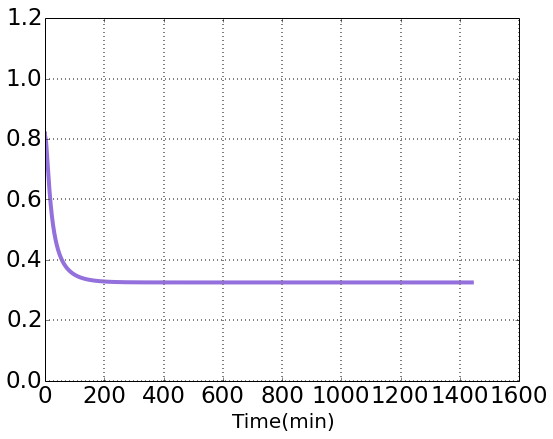

In [8]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Free_A_seq_bind_weak_S_50_deg_ratio_GRAPH2.eps',format="eps")
show()

## Total A 100kon

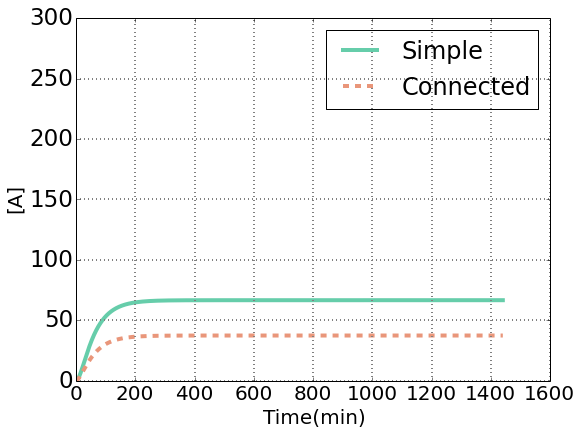

In [9]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


ptot2=300
kon=0; koff=0;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5
d4=0.02;

k4=0.1*k3;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;
kon5=10*kon3;
koff5=koff3;

kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

##################################
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_seq_dim_S_50_deg_strong.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


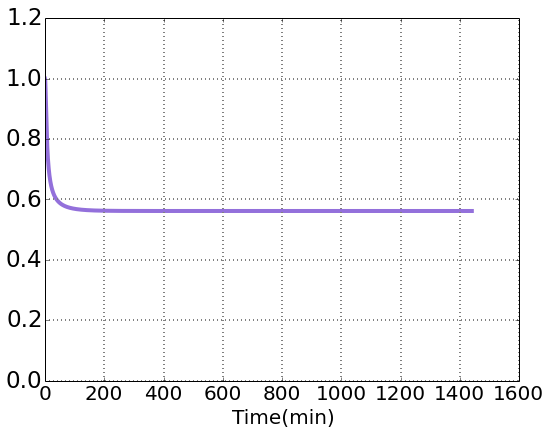

In [10]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_seq_dim_S_50_strong.eps',format="eps")
show()

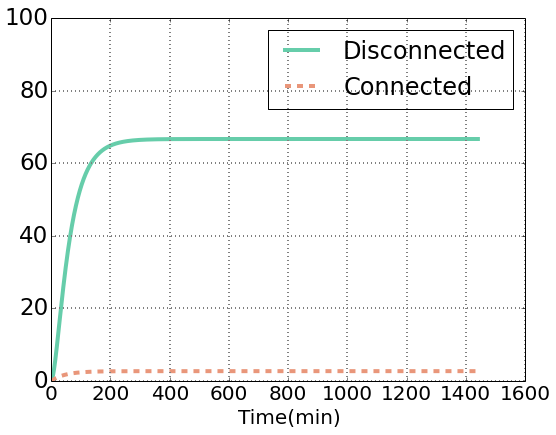

In [11]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_seq_dim_S_50_deg_strong_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


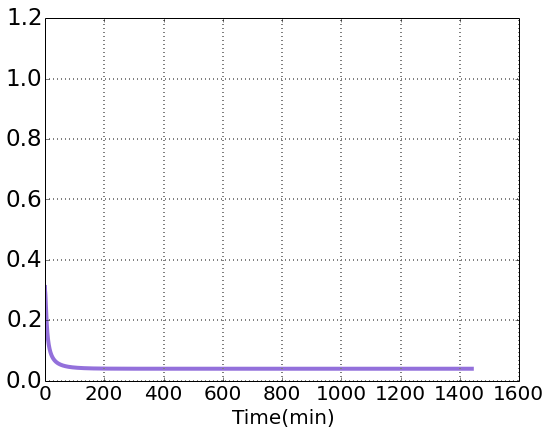

In [12]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Freeseq_dim_S_50_100kon_deg_ratio_strong.eps',format="eps")
show()

## Total A koff/100

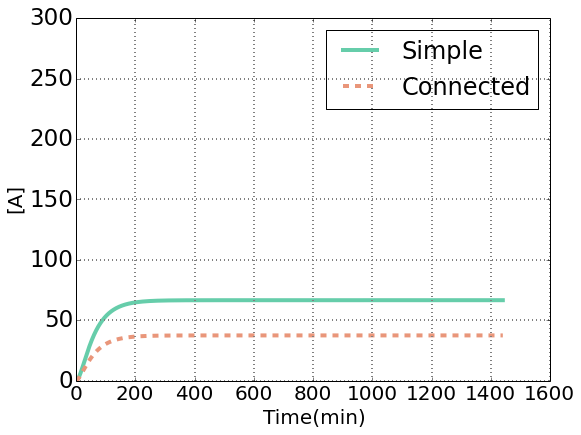

In [13]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



ptot2=300
kon=0; koff=0;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5
d4=0.02;

k4=0.1*k3;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;
kon5=kon3;
koff5=koff3/10;

kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0

##################################
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Total_A_seq_dim_S_50_deg_entre_100_koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


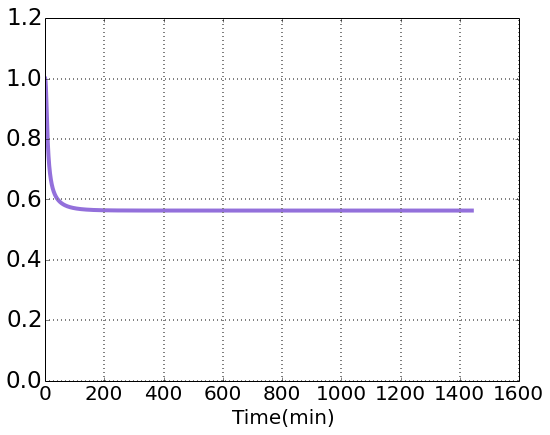

In [14]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b1_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_seq_dim_S_50_entre_100_koff.eps',format="eps")
show()

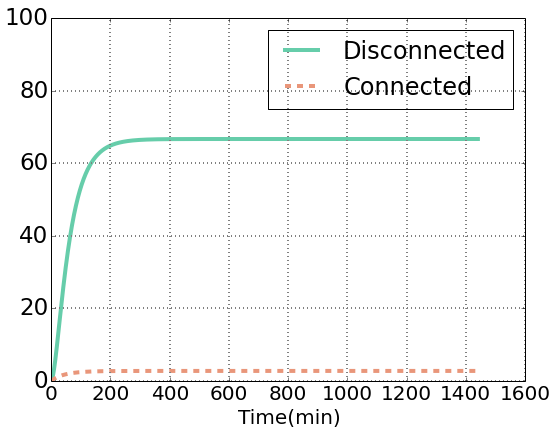

In [15]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_seq_dim_S_50_deg_entre_100_koff.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


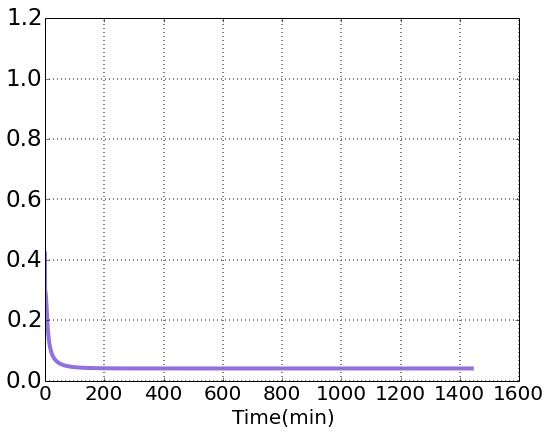

In [16]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
l1_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Freeseq_dim_S_50_deg_ratio_entre_100_koff.eps',format="eps")
show()

## Total A no deg de complejo

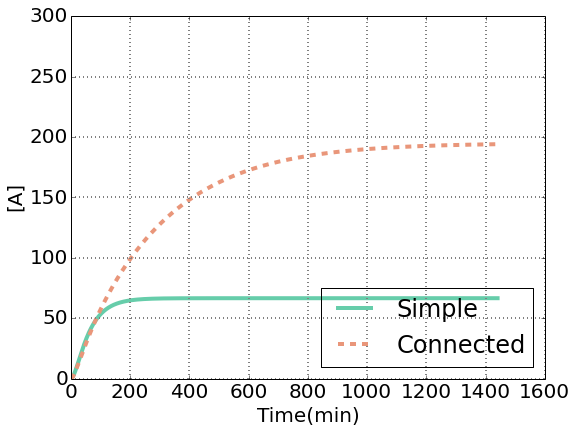

In [17]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
########################


d4=0;

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])#*
soln=odeint(f_1,xob,t)

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_seq_bind_weak_GRAPH2.eps',format="eps")
show()





/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


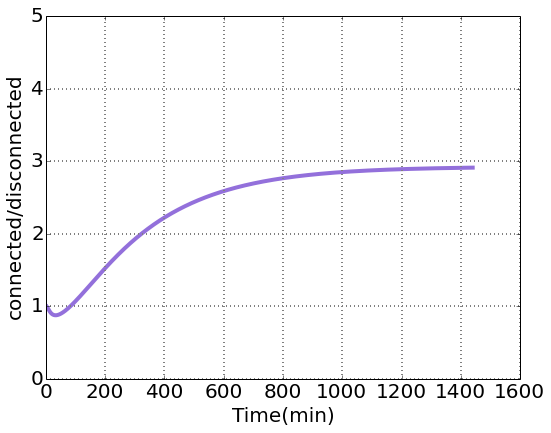

In [18]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
a2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_bin_weak.eps',format="eps")
show()

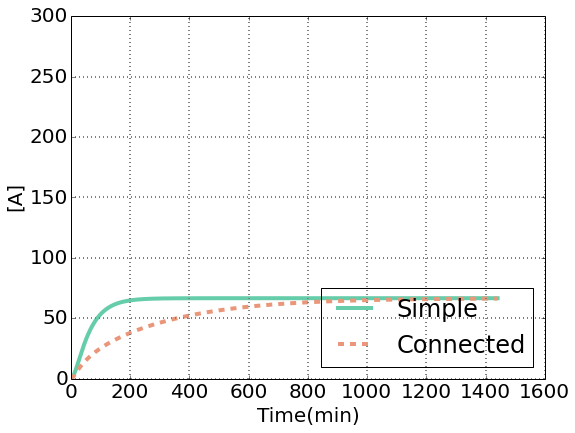

In [19]:

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_seq_bind_weak_no_deg.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


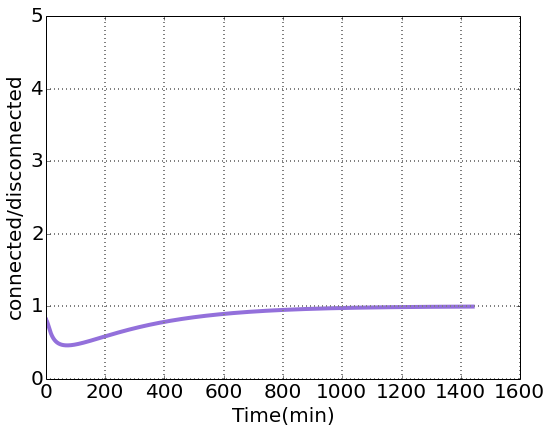

In [20]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bin_weak_no_deg.eps',format="eps")
show()

## Total A No deg de complejo strong

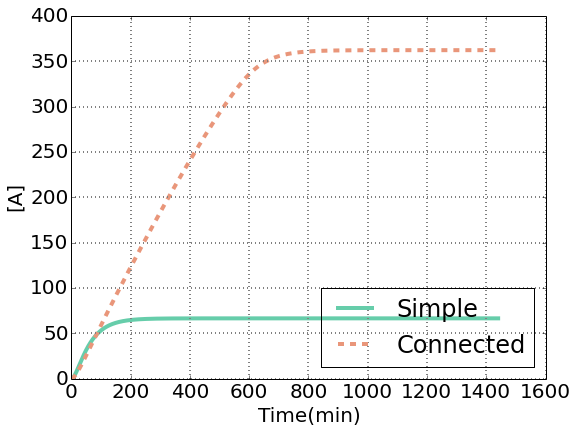

In [21]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
########################


d4=0;
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,400])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_strong_no_deg.eps',format="eps")
show()



/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


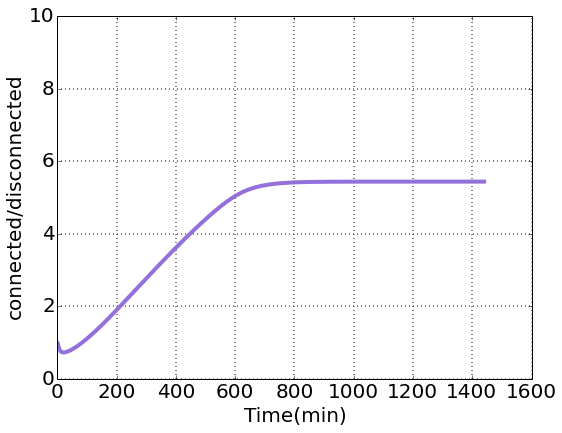

In [22]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,10])
fig.savefig('Total_A_seq_bind_strong_ratio_no_deg.eps',format="eps")
show()

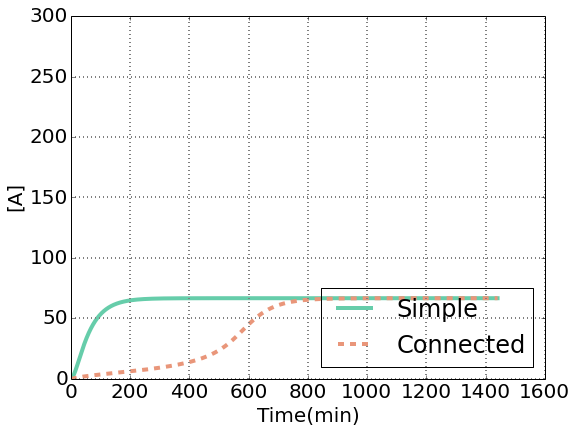

In [23]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_no_deg_seq_bin.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


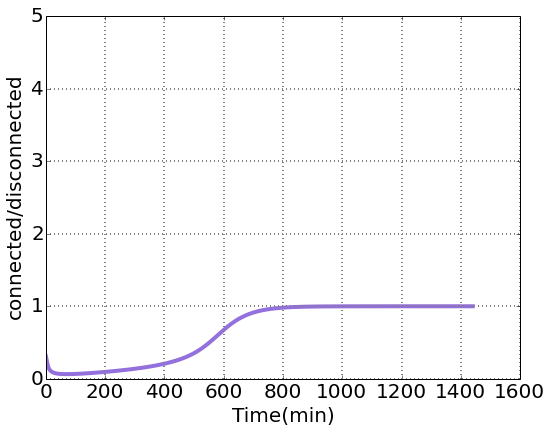

In [24]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_strong_no_deg.eps',format="eps")
show()

## Total A No deg de complejo koff/100

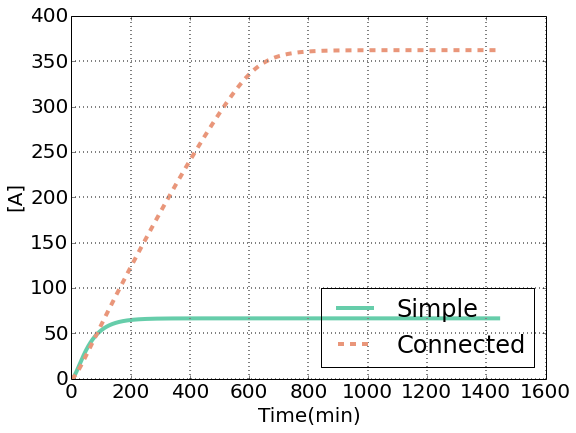

In [25]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60/10;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0
########################


d4=0;
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,400])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_strong_koff_10_no_deg.eps',format="eps")
show()




/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


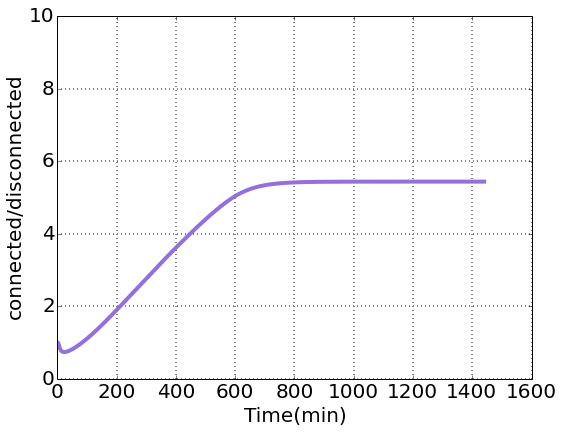

In [26]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,10])
fig.savefig('Total_A_seq_bind_ratio_strong_koff_10_no_deg.eps',format="eps")
show()

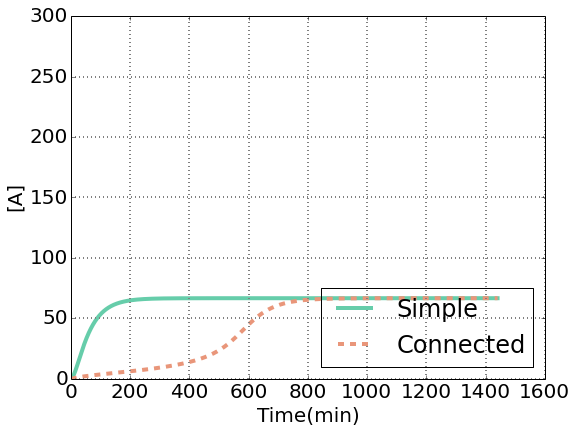

In [27]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_no_deg_seq_bin_koff_10.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


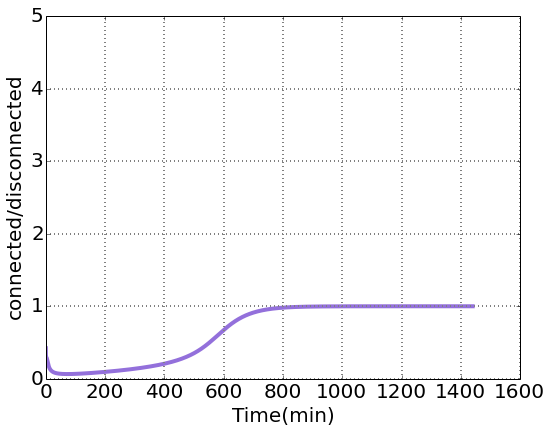

In [28]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_strong_no_deg.eps',format="eps")
show()

## Total A deg 0.25

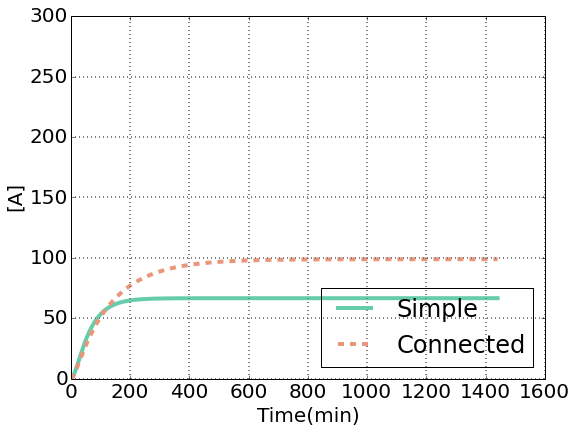

In [29]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
########################
##############################

d4=0.25*d;
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)
pylab.ylim([0,300])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_S_50_0.25_deg_weak.eps',format="eps")
show()



/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


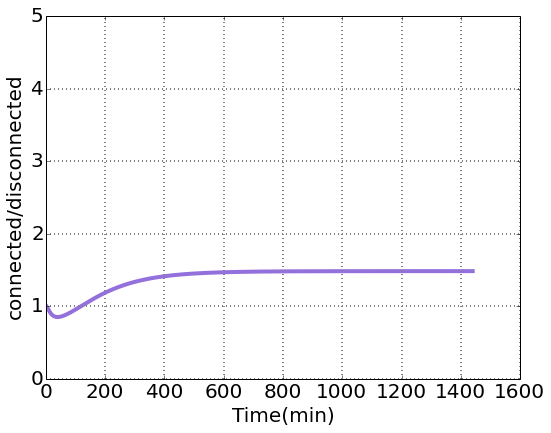

In [30]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
a3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_025_deg_ratio_GRAPH2.eps',format="eps")
show()

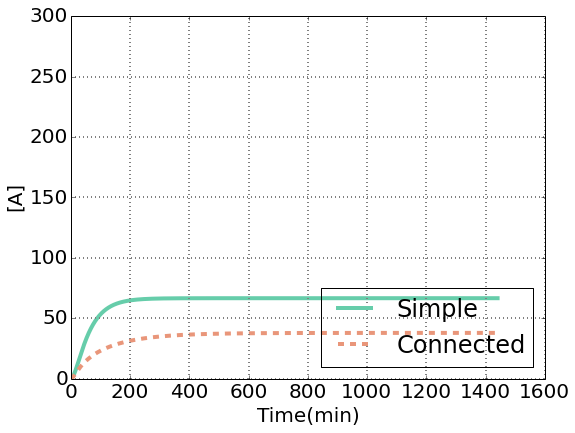

In [31]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_0.25_deg_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


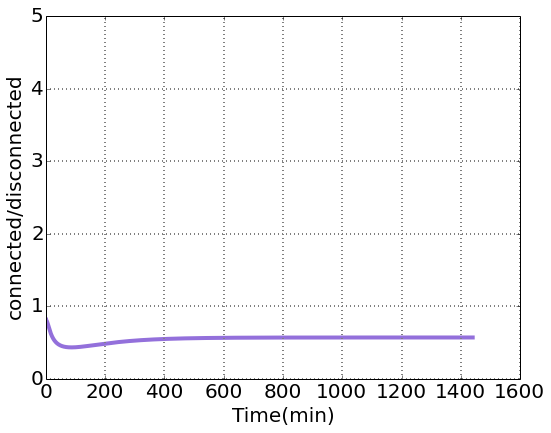

In [32]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_025_deg_ratio_GRAPH2.eps',format="eps")
show()

## Total A deg 0.25 strong

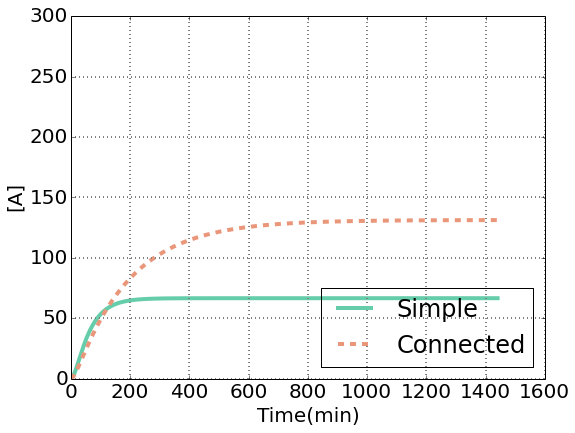

In [33]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
########################
d4=0.25*d

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_S_50_025_deg_strong.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


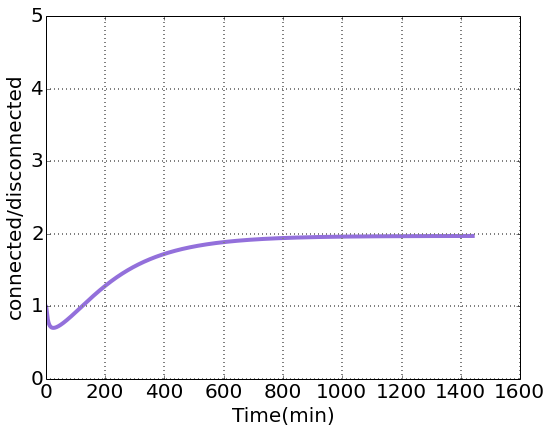

In [34]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_dim_S_50_025_deg_ratio_strong.eps',format="eps")
show()

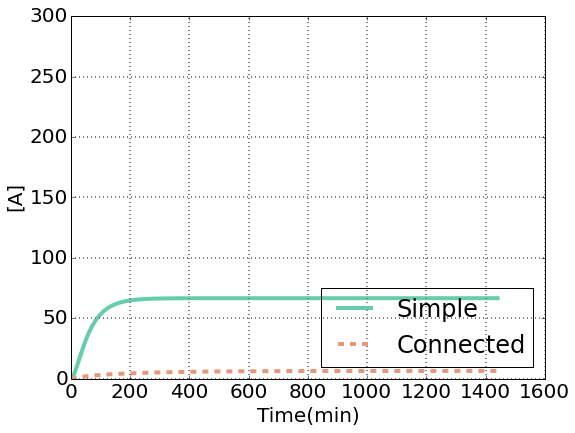

In [35]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_025_deg_strong.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


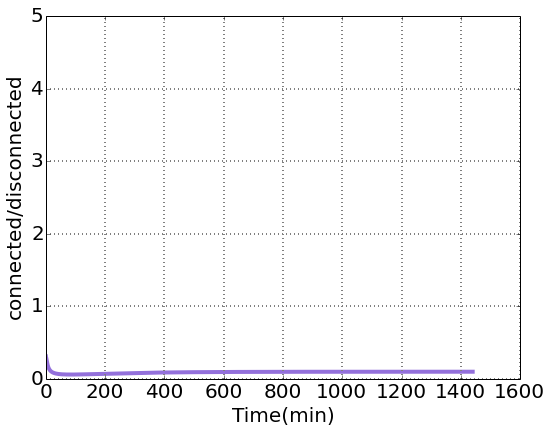

In [36]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_025_deg_ratio_strong.eps',format="eps")
show()

## Total A deg 0.25 strong koff/10

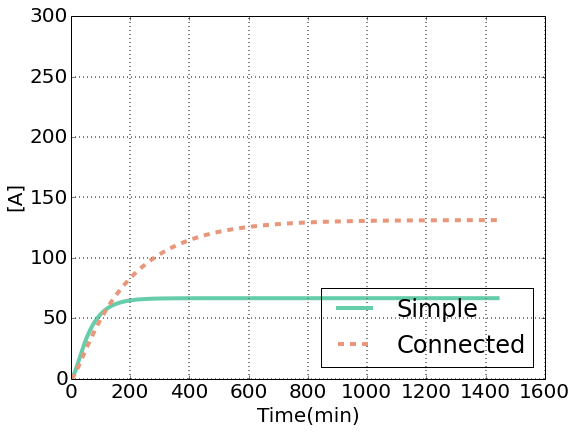

In [37]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60/10;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0
########################
d4=0.25*d

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_S_50_025_deg_strong_koff_10.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


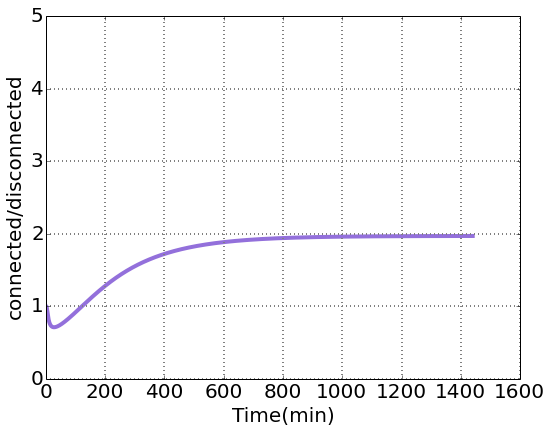

In [38]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_dim_S_50_025_deg_ratio_strong_koff_10.eps',format="eps")
show()

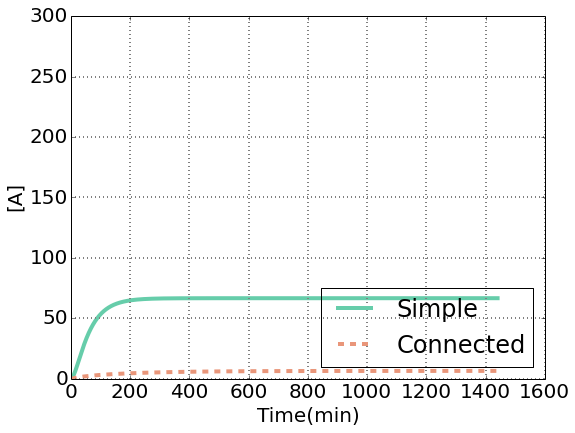

In [39]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_025_deg_strong_koff_10.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


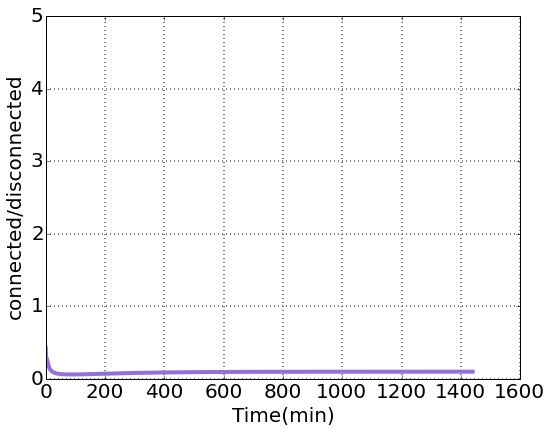

In [40]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_025_deg_ratio_strong_koff_10.eps',format="eps")
show()

## Total A deg 0.5

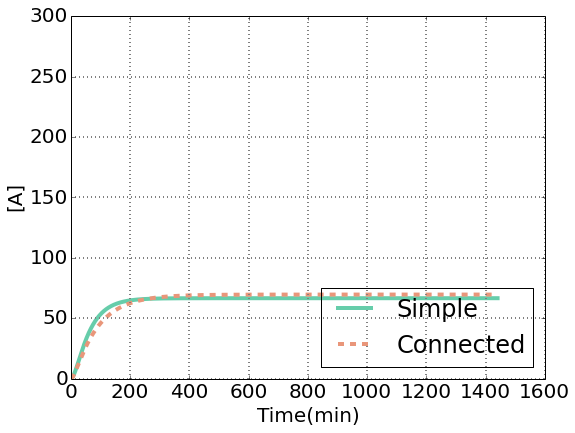

In [41]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
########################
d4=0.5*d

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)


pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_S_50_05_deg_weak.eps',format="eps")
show()




/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


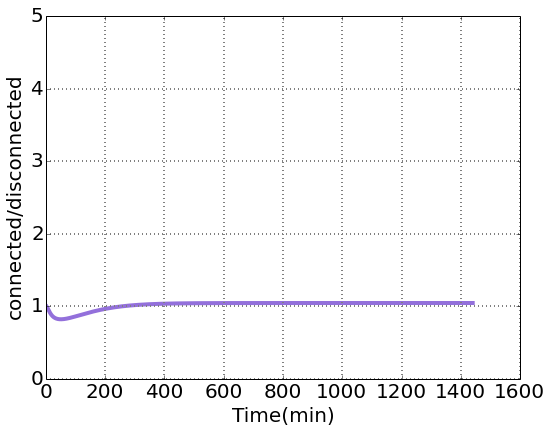

In [42]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
a4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_bind_S_50_05_deg_ratio_weak.eps',format="eps")
show()

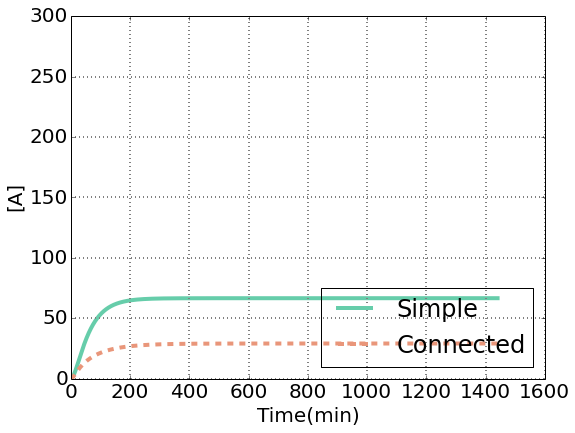

In [43]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_0.25_deg_weak.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


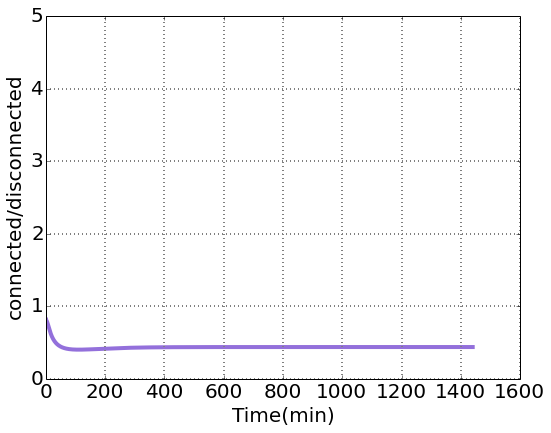

In [44]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_deg_S_50_05_deg_ratio_weak.eps',format="eps")
show()

## Total A deg 0.5 100 kon

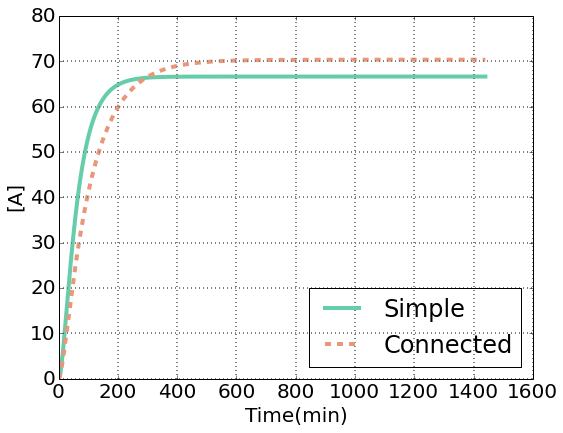

In [45]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
########################
d4=0.5*d

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)
xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_case_seq_S_50_05_deg_strong_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


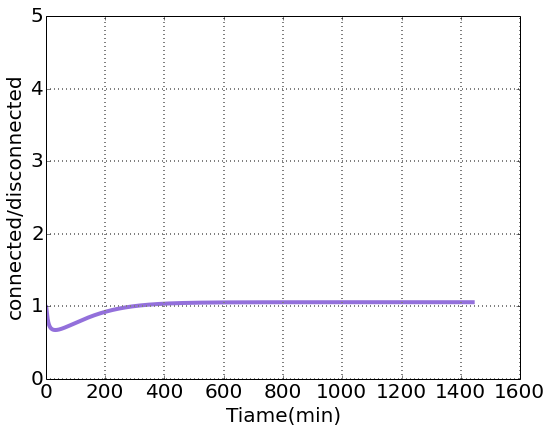

In [46]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Tiame(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_bind_S_50_05_deg_ratio_strong.eps',format="eps")
show()

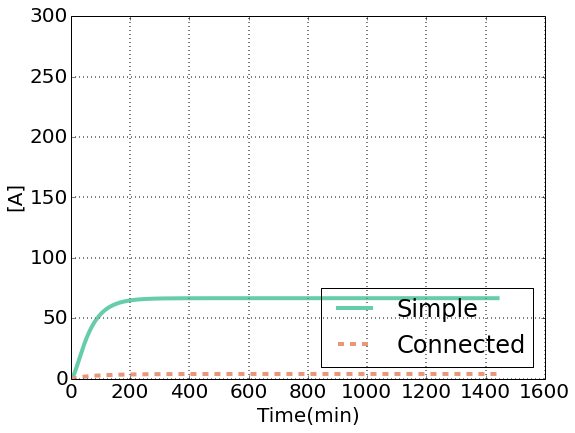

In [47]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_05_deg_100kon_strong.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


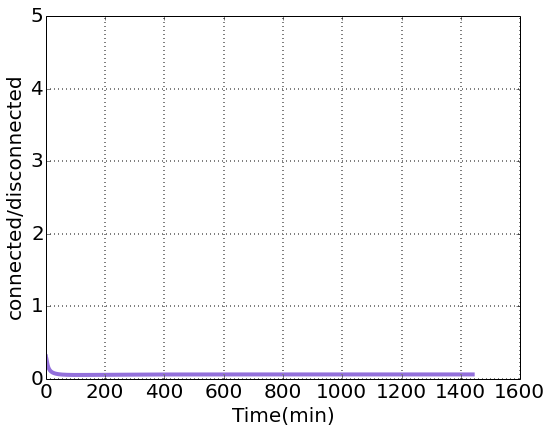

In [48]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_05_deg_ratio_strong.eps',format="eps")
show()

## Total A deg 0.5 koff/100

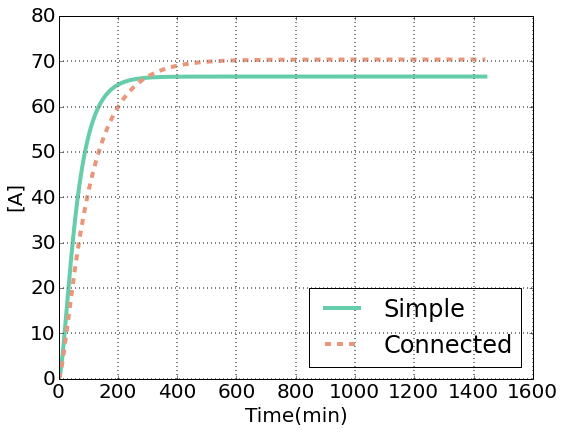

In [49]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60/10;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0
########################
d4=0.5*d

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)
xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_case_seq_S_50_05_deg_koff_entre_10_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


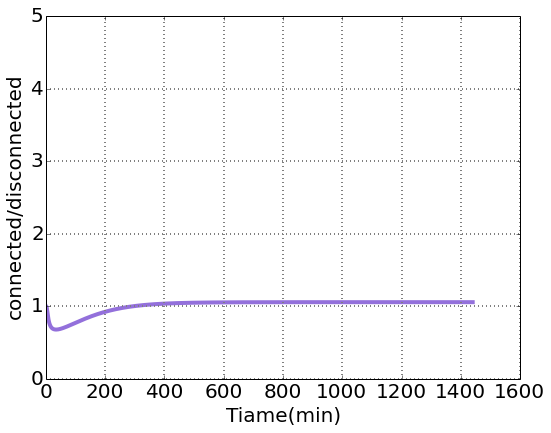

In [50]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Tiame(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_bind_S_50_05_deg_ratio_strong_koff_entre_10.eps',format="eps")
show()

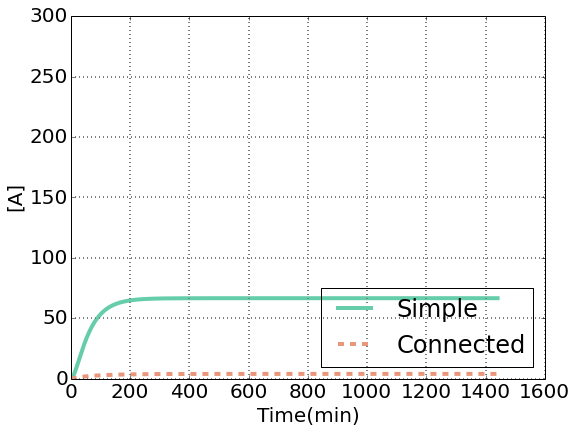

In [51]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_05_deg_100kon_strong_koff_entre_10.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


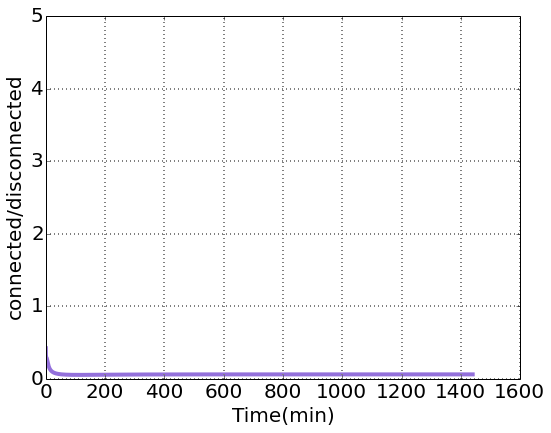

In [52]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_05_deg_ratio_strong_koff_entre_10.eps',format="eps")
show()

## Total A deg 2

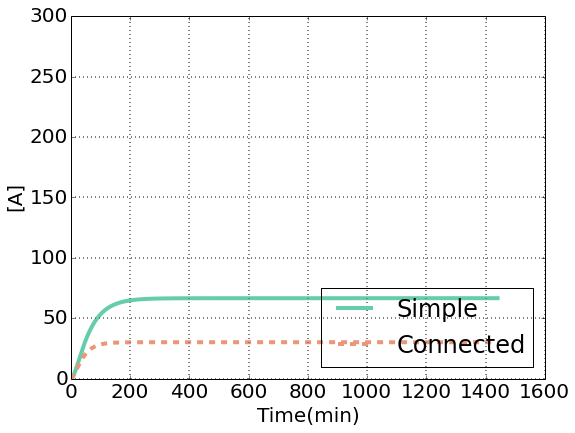

In [53]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0


d4=2*d;
xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_S_50_2_deg_weak.eps',format="eps")
show()



/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


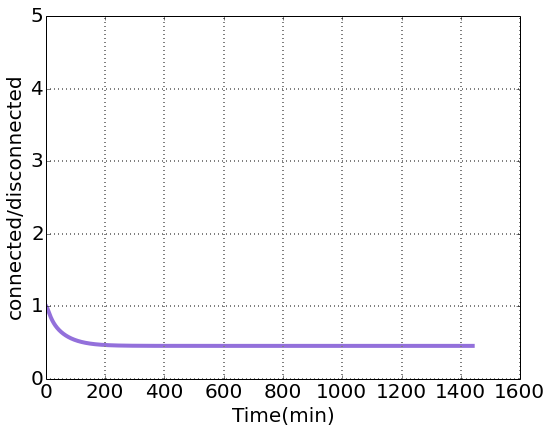

In [54]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
a5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_2_deg_ratio_GRAPH2.eps',format="eps")
show()

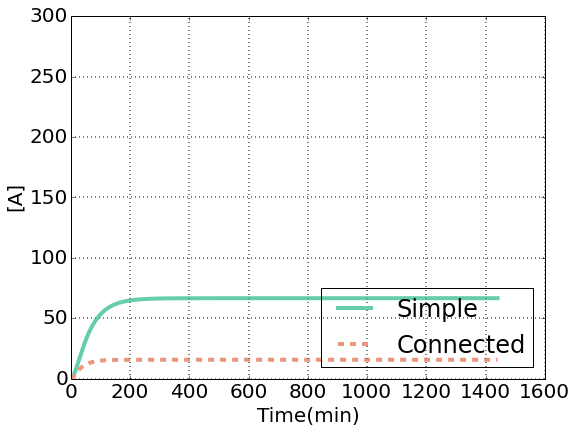

In [55]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_2_deg_weak.eps',format="eps")
show()




/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


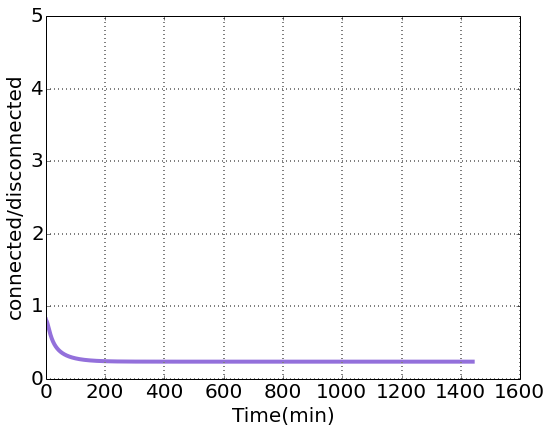

In [56]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_2_deg_ratio_weak.eps',format="eps")
show()

## Total A deg 2 kon 100

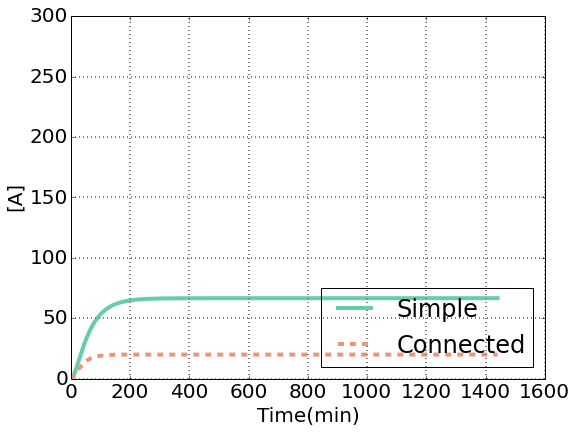

In [57]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=10*(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0
#########################
d4=2*d;

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_S_50_2_deg_strong.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


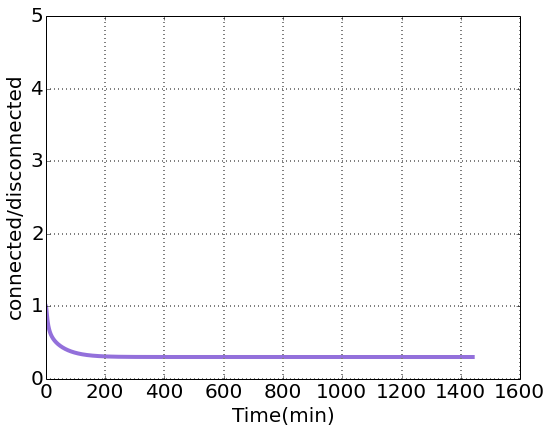

In [58]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_bind_S_50_2_deg_ratio_GRAPH2_strong.eps',format="eps")
show()

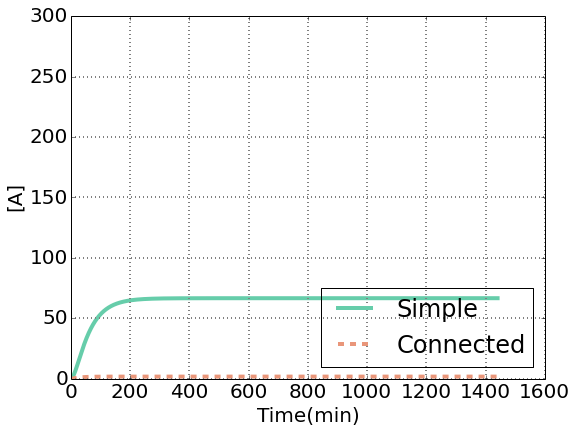

In [59]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_2_deg_strong.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


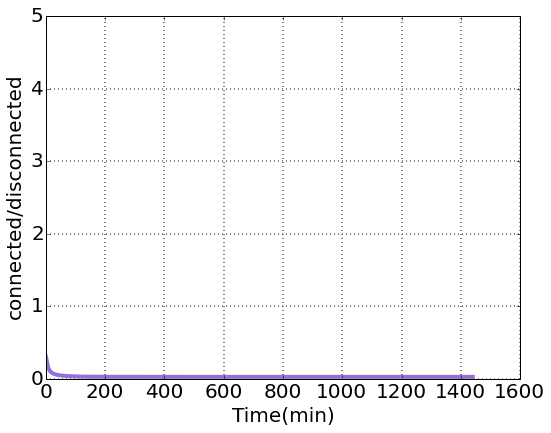

In [60]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_2_deg_ratio_strong.eps',format="eps")
show()

## Total A deg 2 kon 100

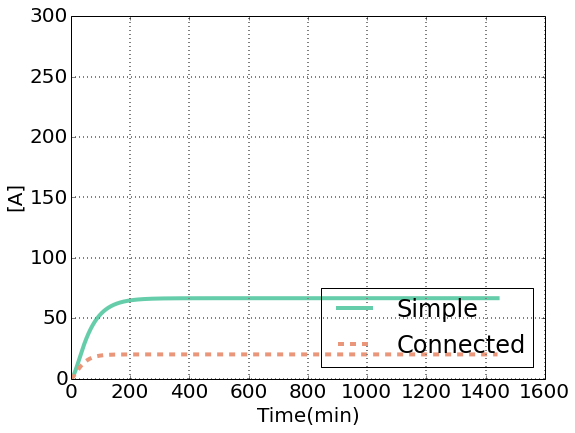

In [61]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=0; kundim=0
k3=0.5

ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60/10;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0
#########################
d4=2*d;

xob = [0, 0, 0, 0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot1-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot1-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_seq_bind_S_50_2_deg_strong_koff_entre_10.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


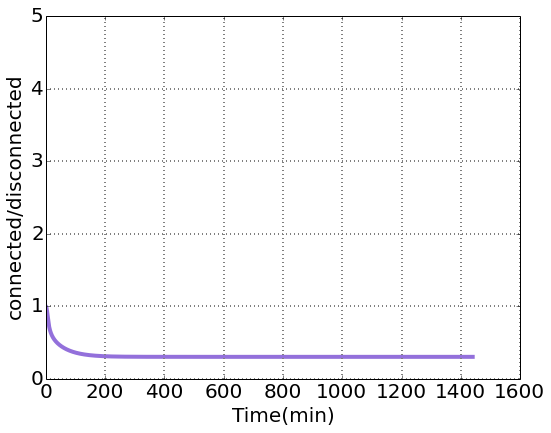

In [62]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2]+soln[:,3]+soln[:,4]+soln[:,5])
b5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_seq_bind_S_50_2_deg_ratio_GRAPH2_strong_koff_entre_10.eps',format="eps")
show()

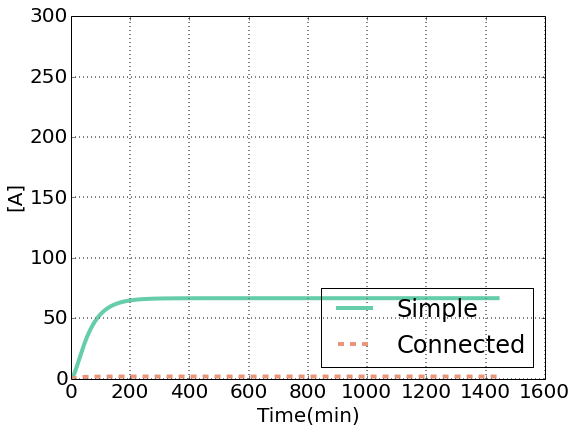

In [63]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_seq_bind_S_50_2_deg_strong_koff_entre_10.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


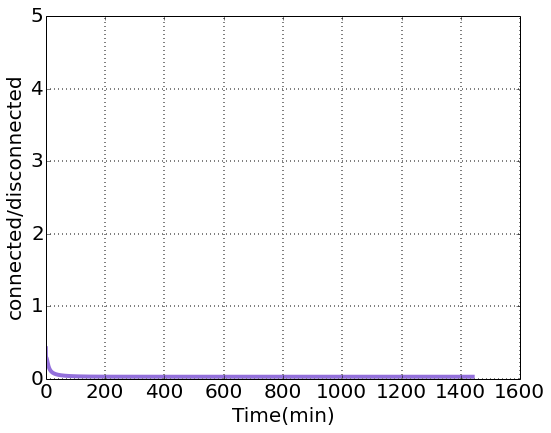

In [64]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_seq_bind_S_50_2_deg_ratio_strong_koff_entre_10.eps',format="eps")
show()

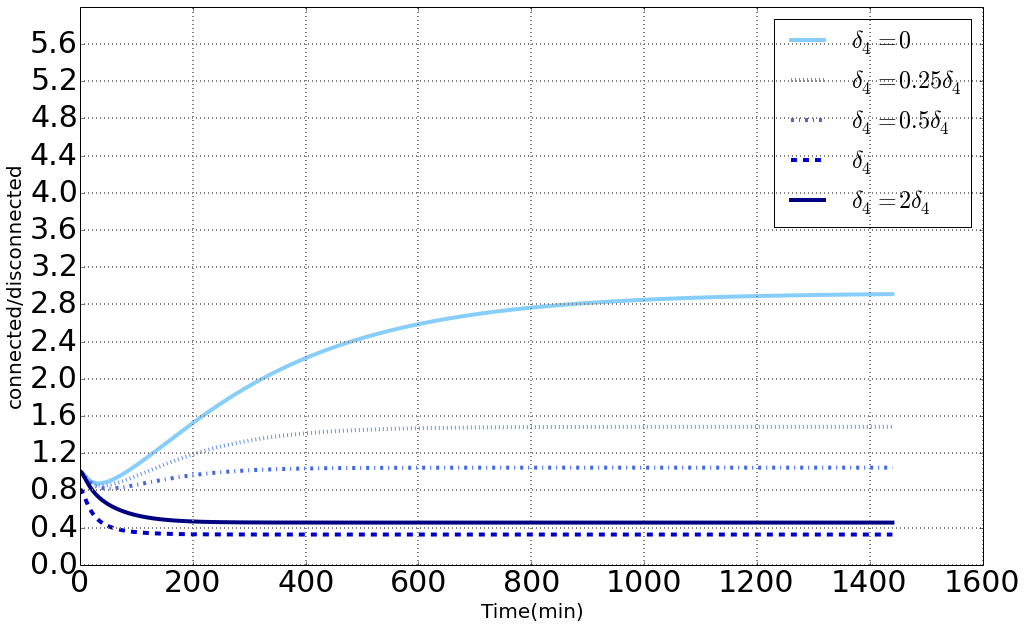

In [65]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a3, ":", color = '#6495ed',lw=4)
line3, =plot(t,a4, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

fig.savefig('Total_A_ratios_kon_case_seq_bind_weak.eps',format="eps")
show()

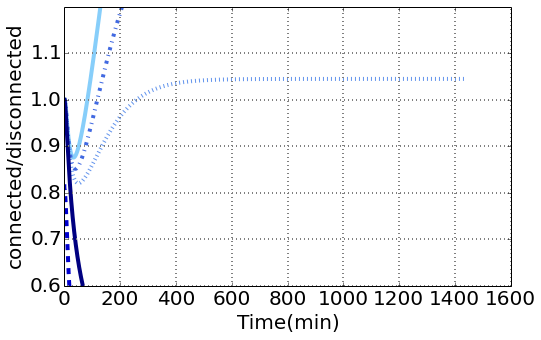

In [66]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a4, ":", color = '#6495ed',lw=4)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0.6,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_Mini_seq_bind_kon_case_weak.eps',format="eps")
show()

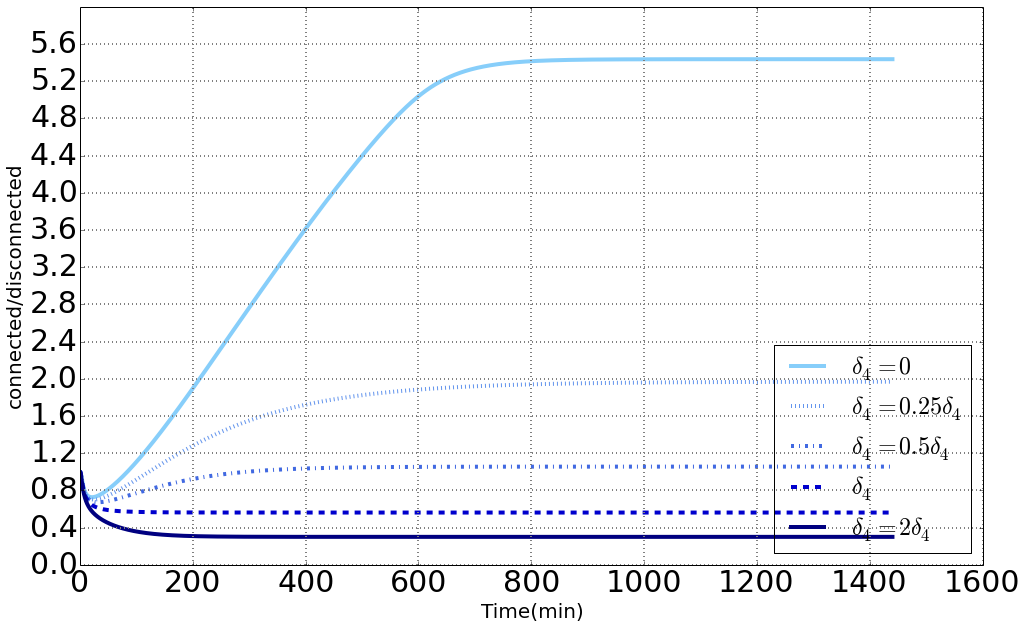

In [67]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,b2,color = '#87cefa', lw=4)
line2, =plot(t,b3, ":", color = '#6495ed',lw=4)
line3, =plot(t,b4, "-.", color = '#4169e1', lw=4)
line4, =plot(t,b1, "--", color = '#0000cd',lw=4)
line5, =plot(t,b5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_strong_case_seq_bind.eps',format="eps")
show()

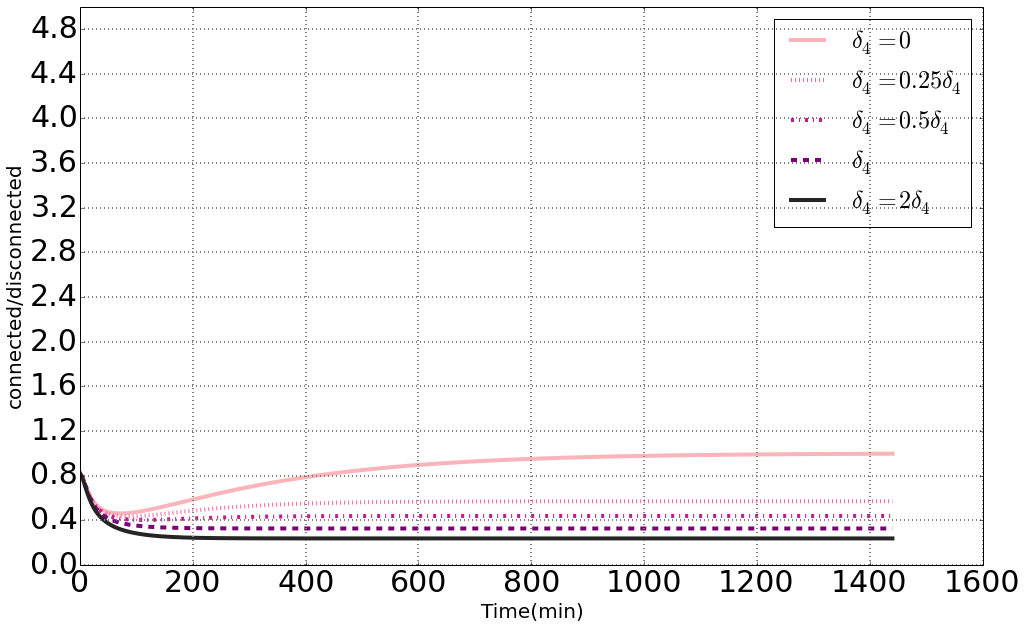

In [68]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c3, ":", color = '#F768A1',lw=4)
line3, =plot(t,c4, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_case_seq_bind_weak.eps',format="eps")
show()

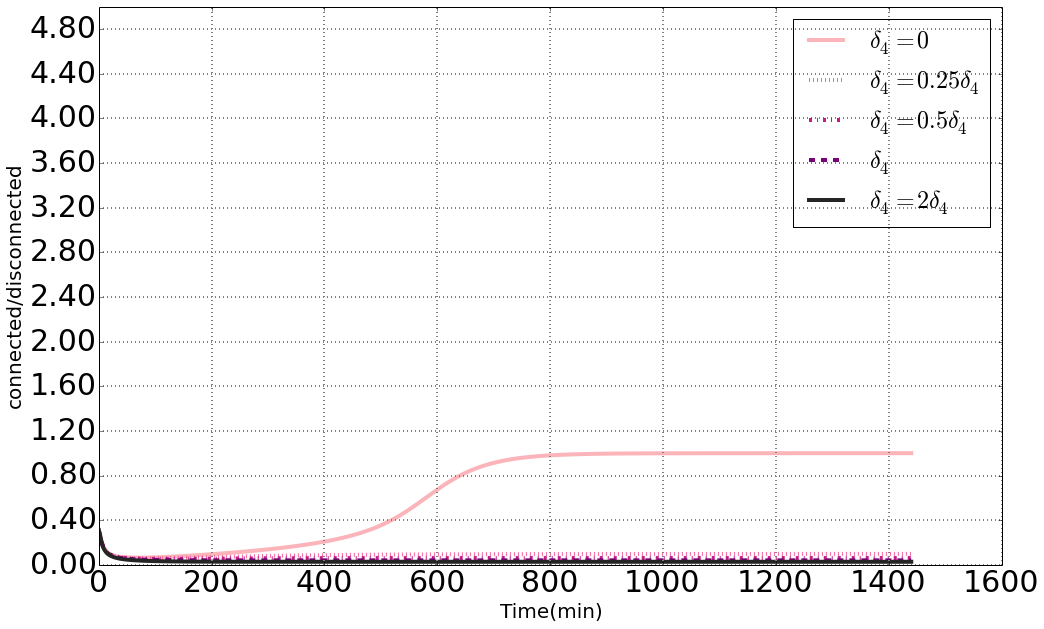

In [69]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,l2,color = '#FBB4B9', lw=4)
line2, =plot(t,l3, ":", color = '#F768A1',lw=4)
line3, =plot(t,l4, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,l1, "--", color = '#7A0177',lw=4)
line5, =plot(t,l5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_Mini_ratios_case_seq_bind_with_legend_strong.eps',format="eps")
show()

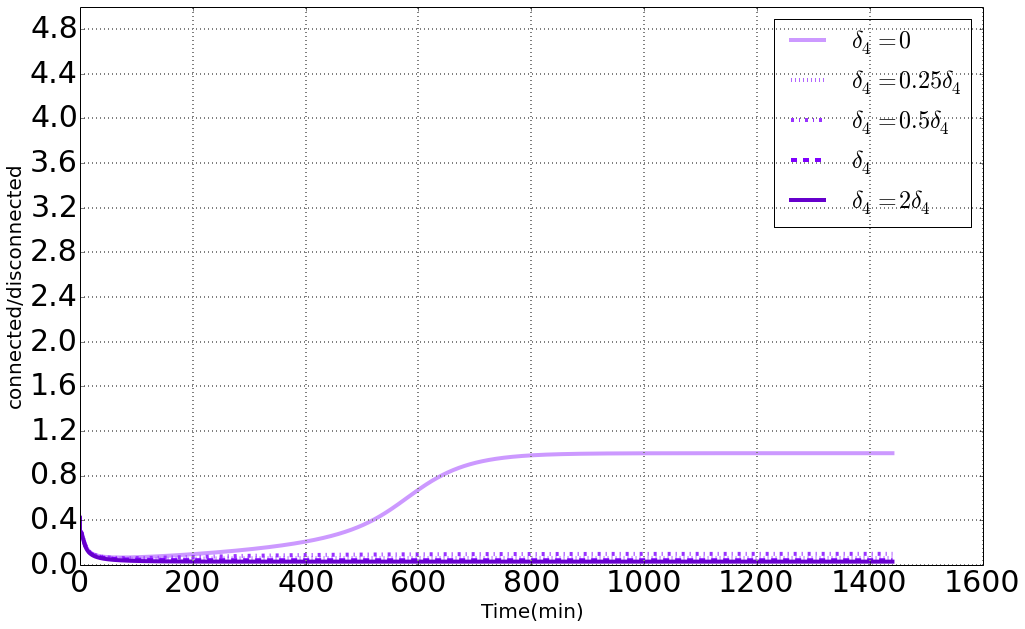

In [70]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)


line1, =plot(t,l2_1,color = '#CC99FF', lw=4)
line2, =plot(t,l4_1, ":", color = '#B266FF',lw=4)
line3, =plot(t,l3_1, "-.", color = '#9933FF', lw=4)
line4, =plot(t,l1_1, "--", color = '#7F00FF',lw=4)
line5, =plot(t,l5_1, color = '#6600CC',lw=4)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

#fig.savefig('Free_A_ratios_koff_entre_1000_case_one.eps',format="eps")
show()